# 4.Twitter Sentiment Analysis: Training the complete train data and applying on test data(final data) 

In [1]:
import pandas as pd

In [2]:
!pip install nlpaug

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nlpaug.augmenter.word as naw
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sns.set_style('darkgrid')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
sns.set_style("whitegrid")

In [4]:
data = pd.read_csv('train.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Text(0, 0.5, 'Count')

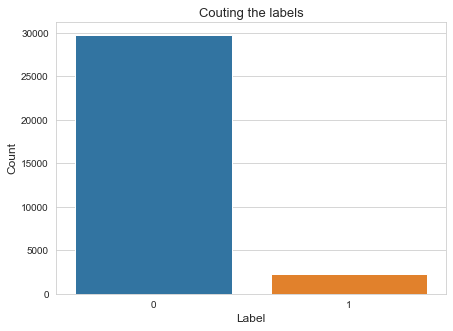

In [5]:
plt.figure(figsize=(7, 5))
plt.title('Couting the labels', fontsize=13)
sns.countplot(data=data, x='label')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [6]:
# First of all we need to tokenize the tweets so we can augmentate them

data_smote = data.copy()
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data_smote)

data_smote['tweet'] = tokenizer.texts_to_sequences(data_smote['tweet'])
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

data_smote['tweet'] = pad_sequences(data_smote['tweet'], padding='post', maxlen=maxlen)

In [7]:
# nplaug
import nltk
nltk.download('averaged_perceptron_tagger')
data_resampled_nlpaug = data.copy()

aug_texts = []
minority_data = data_resampled_nlpaug[data_resampled_nlpaug['label'] == 1]
aug = naw.SynonymAug(aug_src='wordnet')

texts = minority_data['tweet'].tolist()

for text in texts:
    augmented_texts = aug.augment(text, n=12)
    
    for augmented in augmented_texts:
        aug_texts.append(augmented)

print(len(aug_texts))

temp = pd.DataFrame({
    'tweet': aug_texts
})
        
temp['label'] = 1
        
data_resampled_nlpaug = pd.concat([data_resampled_nlpaug, temp], axis=0)
data_resampled_nlpaug = data_resampled_nlpaug.reset_index()
data_resampled_nlpaug = data_resampled_nlpaug.drop(columns=['index'])
del temp, minority_data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


26904


Text(0, 0.5, 'Count')

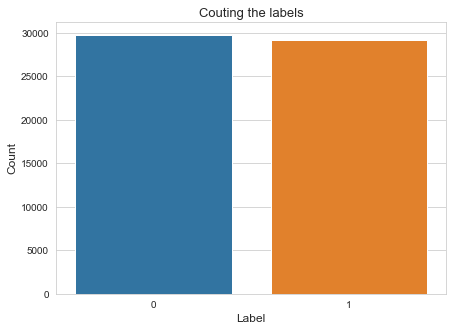

In [8]:
plt.figure(figsize=(7, 5))
plt.title('Couting the labels', fontsize=13)
sns.countplot(data=data_resampled_nlpaug, x='label')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [9]:
counts = pd.DataFrame({
    'Label': data_resampled_nlpaug['label'].value_counts().index,
    'Count': data_resampled_nlpaug['label'].value_counts().values,
    'Percentage':  data_resampled_nlpaug['label'].value_counts().values/data_resampled_nlpaug.shape[0]
})

counts.head()

,Label,Count,Percentage
0,0,29720,0.504875
1,1,29146,0.495125


In [10]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
data_resampled_nlpaug.label.value_counts()

0    29720
1    29146
Name: label, dtype: int64

In [12]:
df=data_resampled_nlpaug
df.drop("id",axis=1,inplace= True)

In [13]:
df.label.value_counts()

0    29720
1    29146
Name: label, dtype: int64

In [14]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [15]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def clean_documents(document):
  stop = stopwords.words('english')
  tokens = word_tokenize(document.lower())

  word_tokens = [token for token in tokens if token.isalpha()]
  clean_tokens = [token for token in word_tokens if token not in stop]

  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]

  return " ".join(lemmatized_tokens)

In [18]:
df["clean_tweet"] = df["clean_tweet"].apply(clean_documents)

In [19]:
df.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit ca use cause offer wheelcha...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time
4,0,factsguide: society now #motivation,factsguide society motivation


In [20]:
X=df.clean_tweet
y=df.label

In [21]:
# NN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, SimpleRNN, Bidirectional, LSTM, GRU 

In [22]:
# Processing text

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [23]:
vocabulary = tokenizer.index_word
vocabulary
vocab_len = len(vocabulary)
vocab_len

37437

In [24]:
train_sequence = tokenizer.texts_to_sequences(X)

In [25]:
doc_len = []
for doc in train_sequence:
    doc_len.append(len(doc))

In [26]:
max(doc_len)

37

In [27]:
np.quantile(doc_len, 0.9999)

24.0

In [28]:
max_len = 24

In [29]:
train_sequence_matrix = sequence.pad_sequences(train_sequence, maxlen= max_len)

In [31]:
# GRU Bidirectional
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(Bidirectional(GRU(128, activation="tanh")))
model.add(Dense(128,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_matrix,y, batch_size=64,epochs=50)

Epoch 1/50
920/920 [==============================] - 137s 133ms/step - loss: 0.0858
Epoch 2/50
920/920 [==============================] - 123s 133ms/step - loss: 0.0177
Epoch 3/50
920/920 [==============================] - 130s 142ms/step - loss: 0.0074
Epoch 4/50
920/920 [==============================] - 133s 144ms/step - loss: 0.0052
Epoch 5/50
920/920 [==============================] - 135s 146ms/step - loss: 0.0037
Epoch 6/50
920/920 [==============================] - 130s 142ms/step - loss: 0.0041
Epoch 7/50
920/920 [==============================] - 113s 122ms/step - loss: 0.0026
Epoch 8/50
920/920 [==============================] - 123s 134ms/step - loss: 0.0029
Epoch 9/50
920/920 [==============================] - 129s 140ms/step - loss: 0.0021
Epoch 10/50
920/920 [==============================] - 125s 136ms/step - loss: 0.0015
Epoch 11/50
920/920 [==============================] - 118s 128ms/step - loss: 0.0017
Epoch 12/50
920/920 [==============================] - 115s 125

In [103]:
test=pd.read_csv("test.csv")

In [104]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [105]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [106]:
# remove twitter handles (@user)
test['clean_tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*")

In [107]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
def clean_documents(document):
  stop = stopwords.words('english')
  tokens = word_tokenize(document.lower())

  word_tokens = [token for token in tokens if token.isalpha()]
  clean_tokens = [token for token in word_tokens if token not in stop]

  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]

  return " ".join(lemmatized_tokens)

In [109]:
test["clean_tweet"] = test["clean_tweet"].apply(clean_documents)

In [110]:
test.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyone see new movie
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday amazing hilarious nephew eli ahmir uncl...


In [111]:
test=test.clean_tweet

In [112]:
# Processing text
# testing
test_sequence = tokenizer.texts_to_sequences(test)
test_sequence_matrix = sequence.pad_sequences(test_sequence, maxlen= max_len)

In [113]:
y_pred=model.predict(test_sequence_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [114]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [115]:
test.head()

0    studiolife aislife requires passion dedication...
1        white supremacist want everyone see new movie
2     safe way heal acne altwaystoheal healthy healing
3    hp cursed child book reservation already yes h...
4    bihday amazing hilarious nephew eli ahmir uncl...
Name: clean_tweet, dtype: object

In [116]:
predictions = pd.DataFrame(y_pred, columns=['Prediction'])

In [117]:
df = pd.concat([test, predictions], axis =1)

In [118]:
df.head()

,clean_tweet,Prediction
0,studiolife aislife requires passion dedication...,0
1,white supremacist want everyone see new movie,0
2,safe way heal acne altwaystoheal healthy healing,0
3,hp cursed child book reservation already yes h...,0
4,bihday amazing hilarious nephew eli ahmir uncl...,0


In [120]:
df

,clean_tweet,Prediction
0,studiolife aislife requires passion dedication...,0
1,white supremacist want everyone see new movie,0
2,safe way heal acne altwaystoheal healthy healing,0
3,hp cursed child book reservation already yes h...,0
4,bihday amazing hilarious nephew eli ahmir uncl...,0
...,...,...
17192,thought factory polarisation trump leadership ...,1
17193,feeling like mermaid hairflip neverready forma...,0
17194,hillary campaigned today ohio omg amp used wor...,0
17195,happy work conference right mindset lead organ...,0


Text(0, 0.5, 'Count')

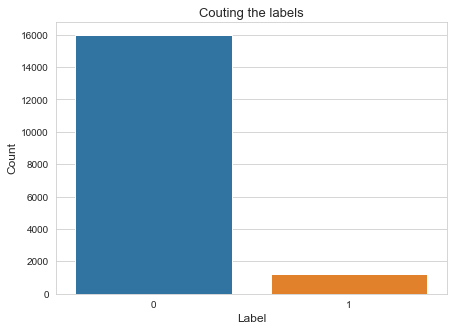

In [122]:
plt.figure(figsize=(7, 5))
plt.title('Couting the labels', fontsize=13)
sns.countplot(data=df, x='Prediction')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)